# Assignment 7: Supervised learning







### March 19th 2018





#### Team Members:
#### Prashant Wankhede (PRW19@pitt.edu)
#### Abhishek Shankarnarayanan (ABS100@pitt.edu)




For the following two data sets, originating from the Irvine Machine Learning Repository (http://archive.ics.uci.edu/ml/):

1) Iris (http://archive.ics.uci.edu/ml/datasets/Iris)

2) Congressional Voting Records (http://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)

a) Build classification models based on each of these algorithms:

    Logistic Regression or SVM
    Random Forest or Boosting (i.e. Adaboost)
    CART (i.e. Decision Tree)

The models should help in classification of types of iris flowers (1) and the parties of congressmen (2) based on flower properties and voting record, respectively. Clean up and discretize the data, if needed (if you need domain knowledge, you can read more about the data sets in the descriptions placed at UCI Repository). Make sure to try different learning algorithms and their parameters.

Once you have learned models, check and report their classification accuracy (by means of a cross-validation method). Try to improve the accuracy by using

b) feature selection,

c) feature expansion (e.g. pairwise interactions, kernel trick), and,

d) combine both together.

Report the best classification accuracy that you have been able to achieve for each of the two data sets along with the methods that gave you the best accuracy. Make sure to summarize your observations and conclusions.


In [13]:
import sys # access to system parameters
print('Python version: {}'.format(sys.version))

import pandas as pd # library of functions for data processing
print('pandas version: {}'.format(pd.__version__))

import matplotlib # functions for visualization
print('matplotlib version: {}'.format(matplotlib.__version__))

import numpy as np # package for scientific computing
print('NumPy version: {}'.format(np.__version__))

import scipy as sp # functions for scientific computing and advanced mathematics
print('SciPy version: {}'.format(sp.__version__))

import IPython.display
from IPython import display # printing fancy in Jupyter notebook
print('IPython version: {}'.format(IPython.__version__))

import sklearn # collection of machine learning algorithms
print('scikit-learn version: {}'.format(sklearn.__version__))

# Some additional nifty functions
import re
import random
import time

import warnings
warnings.filterwarnings('ignore')

# Model algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process, neural_network

# Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure visualization defaults
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

Python version: 3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.20.3
matplotlib version: 2.1.0
NumPy version: 1.13.3
SciPy version: 0.19.1
IPython version: 6.1.0
scikit-learn version: 0.19.1


In [14]:
column_names = ['party', 'handicap', 'water', 'budget', 'physician', 'elsavador', 'religion', 'satellite', 'nicaraguan',
               'missile', 'immigration', 'snyfuels', 'education', 'superfund', 'crime', 'dutyfree', 'export']
# Data for visualizations, training and testing
data = pd.read_csv('C:/Users/work/Desktop/DA/house-votes-84.data', names=column_names)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party          435 non-null object
handicap       435 non-null object
water          435 non-null object
budget         435 non-null object
physician      435 non-null object
elsavador      435 non-null object
religion       435 non-null object
satellite      435 non-null object
nicaraguan     435 non-null object
missile        435 non-null object
immigration    435 non-null object
snyfuels       435 non-null object
education      435 non-null object
superfund      435 non-null object
crime          435 non-null object
dutyfree       435 non-null object
export         435 non-null object
dtypes: object(17)
memory usage: 57.9+ KB


In [16]:
data.describe()

,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [17]:
data.head()

,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


Total: 435

Republicans: 168

Democrats: 267

Votes : 16

In [18]:
print('Training data with null values: \n',data.isnull().sum())

Training data with null values: 
 party          0
handicap       0
water          0
budget         0
physician      0
elsavador      0
religion       0
satellite      0
nicaraguan     0
missile        0
immigration    0
snyfuels       0
education      0
superfund      0
crime          0
dutyfree       0
export         0
dtype: int64


In [19]:


## Change 'y' and 'n' to 1 and 0.
data.replace(to_replace='y', value=1, inplace = True)
data.replace(to_replace='n', value=0, inplace = True)

In [20]:
## Replace ? with the votes' mean
data.replace(to_replace='?', value=np.nan, inplace = True)
data.fillna(data.mean(), inplace=True)


,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
0,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.362319,1.000000,1.000000,1.000000,0.000000,1.000000
1,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.812689
2,democrat,0.44208,1.000000,1.000000,0.417453,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
3,democrat,0.00000,1.000000,1.000000,0.000000,0.504762,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
4,democrat,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.423267,1.000000,1.000000,1.000000,1.000000
5,democrat,0.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
6,democrat,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.509756,1.000000,1.000000,1.000000
7,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.427518,1.000000
8,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
9,democrat,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.427518,0.812689


In [21]:
data

,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
0,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.362319,1.000000,1.000000,1.000000,0.000000,1.000000
1,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.812689
2,democrat,0.44208,1.000000,1.000000,0.417453,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
3,democrat,0.00000,1.000000,1.000000,0.000000,0.504762,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
4,democrat,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.423267,1.000000,1.000000,1.000000,1.000000
5,democrat,0.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
6,democrat,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.509756,1.000000,1.000000,1.000000
7,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.427518,1.000000
8,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
9,democrat,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.427518,0.812689


In [22]:
from sklearn.cross_validation import train_test_split


X = data.drop(['party'], 1)
y = data.party

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)



In [23]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


## Make a logistic regression object, fit it on the training set, and test it to find accuracy
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
logistic_prediction = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, logistic_prediction)
print ('logistic regression accuracy:\t %.3f' % log_reg_accuracy)



logistic regression accuracy:	 0.939


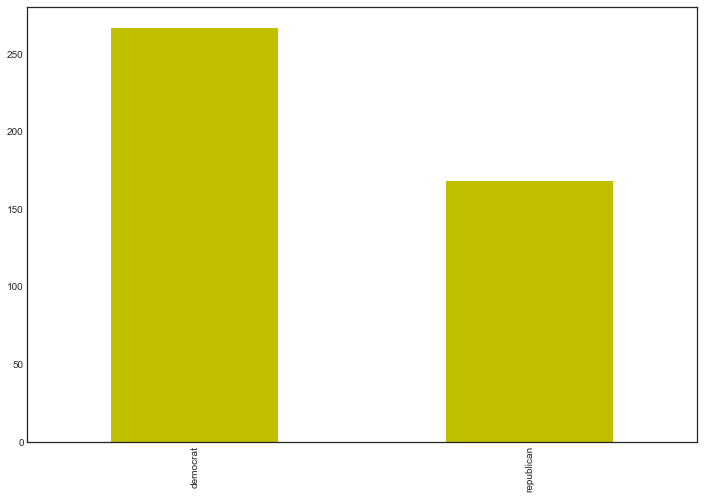

In [24]:
data.party.value_counts().plot(kind = 'bar', color='y')

In [25]:
## Here's a predictor that predicts everyone to be a democrat
def all_democrat(X):
    return ['democrat' for _ in range(len(X))]

democrat_prediction = all_democrat(X_test)
dem_acc = accuracy_score(y_test, democrat_prediction)
print (dem_acc)

0.587786259542


In [26]:
## Here's a predictor that predicts everyone to be a republican
def all_republican(X):
    return ['republican' for _ in range(len(X))]

republican_prediction = all_republican(X_test)
rep_acc = accuracy_score(y_test, republican_prediction)
print (rep_acc)

0.412213740458


In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predict = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predict)
print ('Gaussian Naive Bayes Classifier accuracy: %.3f' % gnb_accuracy)
print('With Parameters:\t' )
print(gnb.get_params())
print('\n')

svm = SVC()
svm.fit(X_train, y_train)
svm_predict = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predict)
print ('Support Vector Machine (SVM)accuracy: %.3f' %svm_accuracy)
print('With Parameters:\t' )
print(svm.get_params())
print('\n')


tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_predict = tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_predict)
print ('Decision Tree accuracy: %.3f' %tree_accuracy)
print('With Parameters:\t' )
print(tree.get_params())
print('\n')


forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest_predict = forest.predict(X_test)
forest_accuracy = accuracy_score(y_test, forest_predict)
print ('Random Forest accuracy: %.3f' %forest_accuracy)
print('With Parameters:\t' )
print(forest.get_params())
print('\n')


Gaussian Naive Bayes Classifier accuracy: 0.939
With Parameters:	
{'priors': None}


Support Vector Machine (SVM)accuracy: 0.954
With Parameters:	
{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Decision Tree accuracy: 0.931
With Parameters:	
{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}


Random Forest accuracy: 0.962
With Parameters:	
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 

 Feature Selection using Recursive Feature Elimination with cross validation

In [61]:
from sklearn.feature_selection import RFECV
m = RFECV(RandomForestClassifier(), scoring = 'accuracy')
m.fit(X_train,y_train)
m.score(X_train,y_train)


1.0

In [67]:
m.support_


array([ True,  True,  True,  True, False, False, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True], dtype=bool)

In [68]:
m.ranking_

array([1, 1, 1, 1, 3, 5, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1])

We can see top 5 features are enough in determining randam forest algorithm's prediction but addition of other features should not harm the prediction, let alone tries to improve it as they are binary yes/no values.

In [29]:
from sklearn.cross_validation import cross_val_score


gnb_cv = np.mean(cross_val_score(gnb, X, y))
svm_cv = np.mean(cross_val_score(svm, X, y))
tree_cv = np.mean(cross_val_score(tree, X, y))
forest_cv = np.mean(cross_val_score(forest, X, y))

print ('Accuracy of Cross Validated Models')
print ('Gaussian Naive Bayes:\t%.3f' %gnb_cv)
print ('Support Vector Machine:\t%.3f' %svm_cv)
print ('Decision Tree:\t\t%.3f' %tree_cv)
print ('Random Forest:\t\t%.3f' %forest_cv)



Accuracy of Cross Validated Models
Gaussian Naive Bayes:	0.931
Support Vector Machine:	0.954
Decision Tree:		0.952
Random Forest:		0.961


In [30]:
data2 = pd.read_csv("C:/Users/work/Desktop/DA/house-votes-84.data", names=column_names)

## Change 'y' and 'n' to 1 and 0. And ? to NaN
data2.replace(to_replace='y', value=1, inplace = True)
data2.replace(to_replace='n', value=0, inplace = True)
data2.replace(to_replace='?', value=np.nan, inplace = True)

In [31]:
## Replace Nan with the votes' mode
data2.fillna(data2.mode().iloc[0], inplace=True)

,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
9,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
y2 = data2.immigration
X2 = data2.drop(['party', 'immigration'], 1)



logistic2 = LogisticRegression()
logistic2.fit(X2, y2)
logistic_cv = np.mean(cross_val_score(logistic2, X2, y2))



print ('Accuracy of predicting Immigration bill votes with Logistic Regression:\t%.3f' % logistic_cv)
print('\n')

svm2 = SVC()
svm2.fit(X2, y2)
svc_cv = np.mean(cross_val_score(svm2, X2, y2))
print ('Accuracy of predicting Immigration bill votes with Logistic Regression:\t%.3f' % svc_cv)
print('With Parameters:\t' )
print(svm2.get_params())
print('\n')

Accuracy of predicting Immigration bill votes with Logistic Regression:	0.524


Accuracy of predicting Immigration bill votes with Logistic Regression:	0.474
With Parameters:	
{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}




In [33]:
# Creating an Algorithm list w/ elements [model name, estimator, parameter grid]
grid_estimators = []

# Logistic Regression
from sklearn.linear_model import LogisticRegression
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'C': param_range,
               'penalty': ['l1', 'l2']}]
grid_estimators.append(['Logistic Regression', LogisticRegression(), param_grid])

# Support Vector Machines
from sklearn.svm import SVC
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'C': param_range,
               'kernel': ['linear']},
              {'C': param_range,
               'gamma': param_range,
               'kernel': ['rbf']}]
grid_estimators.append(['Support Vector Machines', SVC(), param_grid])

# Random Forest
from sklearn.ensemble import RandomForestClassifier
param_grid = [{'n_estimators': [10, 100, 1000],
               'max_features': [4, 7, 16],
               'max_depth': [2, 4, 6, 8],
               'criterion': ['entropy']}]
grid_estimators.append(['Random Forest', RandomForestClassifier(), param_grid])

# K Nearest Neighbors
from sklearn.tree import DecisionTreeClassifier
param_grid = [{'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}]
grid_estimators.append(['Decision Trees', DecisionTreeClassifier(), param_grid])



In [34]:


# Performing 5x2 Nested CV for each algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

for model in grid_estimators:
    gs = GridSearchCV(estimator=model[1],
                      param_grid=model[2],
                      scoring='accuracy',
                      cv=2)
    scores = cross_val_score(estimator=gs,
                                X=X_train,
                                y=y_train,
                                cv=5)
    print('Model: %s; CV Accuracy: %.3f +/- %.3f' 
          % (model[0], 
             np.mean(scores), 
             np.std(scores)))


Model: Logistic Regression; CV Accuracy: 0.967 +/- 0.018
Model: Support Vector Machines; CV Accuracy: 0.957 +/- 0.037
Model: Random Forest; CV Accuracy: 0.957 +/- 0.037
Model: Decision Trees; CV Accuracy: 0.951 +/- 0.033


In [35]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'C': param_range,
               'kernel': ['linear']},
              {'C': param_range,
               'gamma': param_range,
               'kernel': ['rbf']}]
gs_svm = GridSearchCV(estimator=SVC(random_state=33),
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5)
gs_svm.fit(X_train, y_train)
print('Grid Search Best CV Accuracy: %.3f +/- %.3f' 
      % (gs_svm.best_score_, 
         gs_svm.cv_results_['std_test_score'][gs_svm.best_index_]))
print('Grid Search Best Parameters: %s' % gs_svm.best_params_)

Grid Search Best CV Accuracy: 0.967 +/- 0.018
Grid Search Best Parameters: {'C': 10.0, 'kernel': 'linear'}


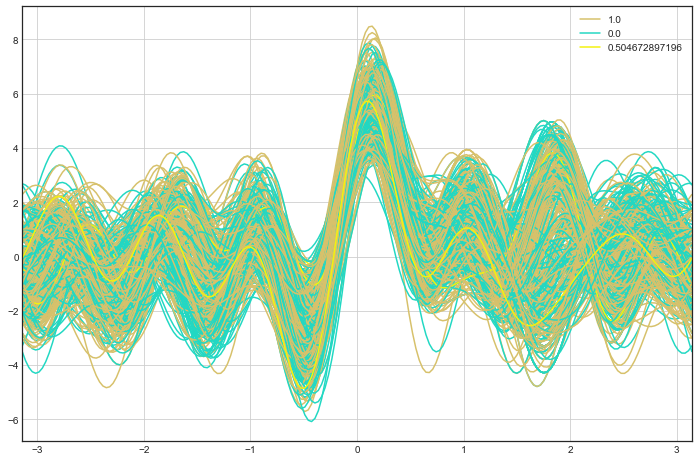

In [36]:
from pandas.tools.plotting import andrews_curves
andrews_curves(data.drop("party", axis=1), "immigration")

# Observations

The RBF kernel with a coefficient of 0.1 and a cost of 1.0 produces the best CV result over the grid search. The resulting accuracy (96.8 $\pm$ 3.1%) is the same as produced from the nested CV search. The final model is trained using these hyperparameters.


Of the algorithms included in this comparison, Support Vector Machines appears to perform the best for this data set. However, it's performance does not significantly improve on any of the other algorithms (within CV error). In fact, all algorithms perform reasonably well, with the possible exception of the non-parametric K-Nearest Neighbors Algorithm.
